In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
#reading the dataset

df = pd.read_csv(r"C:\Users\Afaque\Downloads\Electric_Vehicle_Population_Data.csv")
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033011902
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,53035091100
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,53035092802
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,53035091301
4,JTMAB3FV7P,Thurston,Rainier,WA,98576,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,53067012530


In [107]:
# Basic EDA: Summary statistics
print("Dataset Overview:\n", df.info())
print("Summary Statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         5305 non-null   object 
 1   County                                             5305 non-null   object 
 2   City                                               5305 non-null   object 
 3   State                                              5305 non-null   object 
 4   Postal Code                                        5305 non-null   int64  
 5   Model Year                                         5305 non-null   int64  
 6   Make                                               5305 non-null   object 
 7   Model                                              5305 non-null   object 
 8   Electric Vehicle Type                              5305 non-null   object 
 9   Clean Al

In [109]:
# Display the first 5 rows of the DataFrame
print("First 5 Rows:")
print(df.head())

First 5 Rows:
   VIN (1-10)    County     City State  Postal Code  Model Year     Make  \
0  5YJ3E1EBXK      King  Seattle    WA        98178        2019    TESLA   
1  5YJYGDEE3L    Kitsap  Poulsbo    WA        98370        2020    TESLA   
2  KM8KRDAF5P    Kitsap   Olalla    WA        98359        2023  HYUNDAI   
3  5UXTA6C0XM    Kitsap  Seabeck    WA        98380        2021      BMW   
4  JTMAB3FV7P  Thurston  Rainier    WA        98576        2023   TOYOTA   

        Model                   Electric Vehicle Type  \
0     MODEL 3          Battery Electric Vehicle (BEV)   
1     MODEL Y          Battery Electric Vehicle (BEV)   
2     IONIQ 5          Battery Electric Vehicle (BEV)   
3          X5  Plug-in Hybrid Electric Vehicle (PHEV)   
4  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1            Clean Alternative Fuel Vehicl

In [111]:
# Display the last 5 rows of the DataFrame
print("Last 5 Rows:")
print(df.tail())

Last 5 Rows:
      VIN (1-10)     County       City State  Postal Code  Model Year  \
5300  JTMABABA4R      Clark  Vancouver    WA        98685        2024   
5301  JTMAAAAAXR       King    Seattle    WA        98125        2024   
5302  WP0AE2A7XJ       King   Kirkland    WA        98033        2018   
5303  1FADP5FU8H       King   Kirkland    WA        98033        2017   
5304  7SAYGDEE3N  Snohomish    Bothell    WA        98012        2022   

         Make     Model                   Electric Vehicle Type  \
5300   SUBARU  SOLTERRA          Battery Electric Vehicle (BEV)   
5301   TOYOTA      BZ4X          Battery Electric Vehicle (BEV)   
5302  PORSCHE  PANAMERA  Plug-in Hybrid Electric Vehicle (PHEV)   
5303     FORD     C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   
5304    TESLA   MODEL Y          Battery Electric Vehicle (BEV)   

      Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
5300  Eligibility unknown as battery range has not b...             0.

In [113]:

# Count missing values in each column
print("Missing Values per Column:")
print(df.isnull().sum())
# Sum of missing values
print("Total Missing Values:")
print(df.isnull().sum().sum())


Missing Values per Column:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       3
Base MSRP                                            3
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64
Total Missing Values:
6


In [119]:
# Use ffill and bfill 
df.ffill(inplace=True)  # Forward fill
df.bfill(inplace=True)  # Backward fill


In [121]:
# Count missing values in each column
print("Missing Values per Column:")
print(df.isnull().sum())
# Sum of missing values
print("Total Missing Values:")
print(df.isnull().sum().sum())


Missing Values per Column:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64
Total Missing Values:
0


In [131]:
import numpy as np

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns  

# Loop through each numeric column to find outliers
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Getting outliers and printing it
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    
    # print(f"Outliers in {column}:")
    # print(outliers.to_list(), "\n")


<Figure size 1200x600 with 0 Axes>

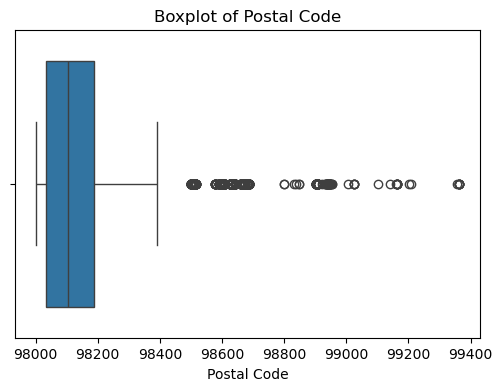

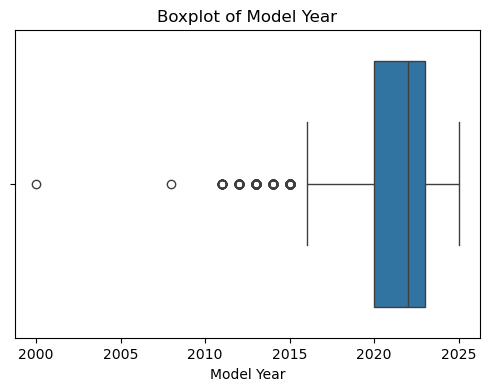

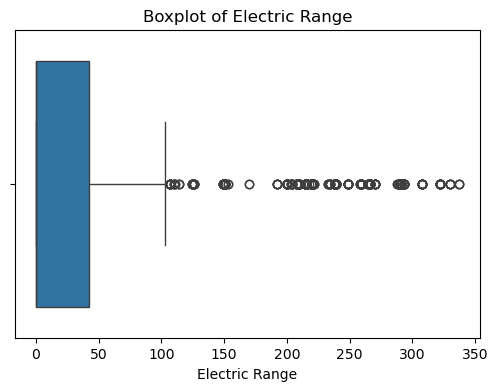

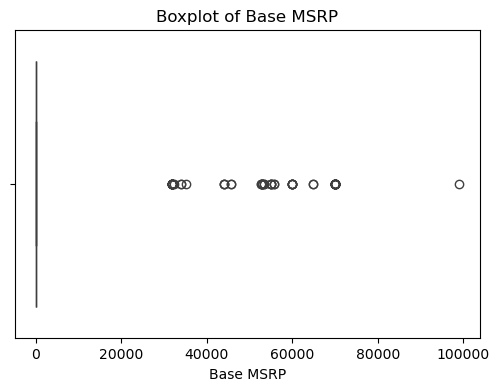

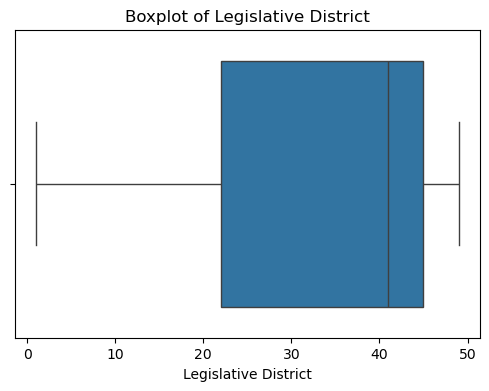

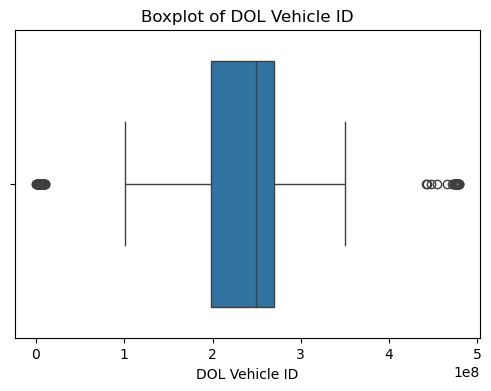

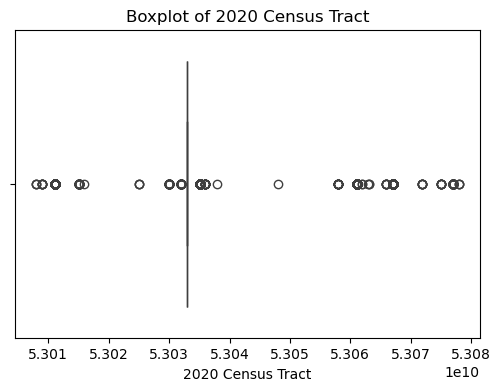

In [125]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns  

# Create boxplots for each numeric column
plt.figure(figsize=(12, 6))  

for column in numeric_cols:
    plt.figure(figsize=(6, 4)) 
    sns.boxplot(x=df[column])  
    plt.title(f"Boxplot of {column}")  
    plt.show()  

In [127]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns  

# Loop through each numeric column to replace outliers
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    
    # Replace outliers with lower and upper bound values
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])



<Figure size 1200x600 with 0 Axes>

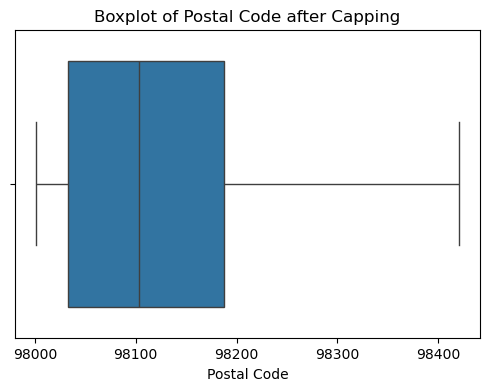

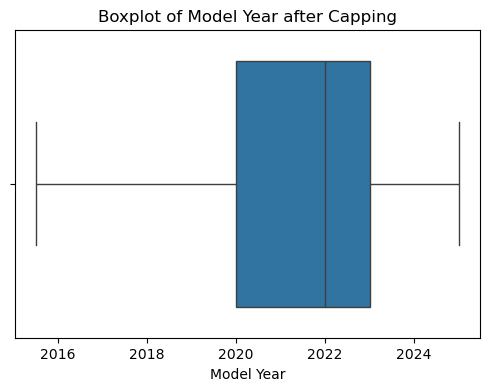

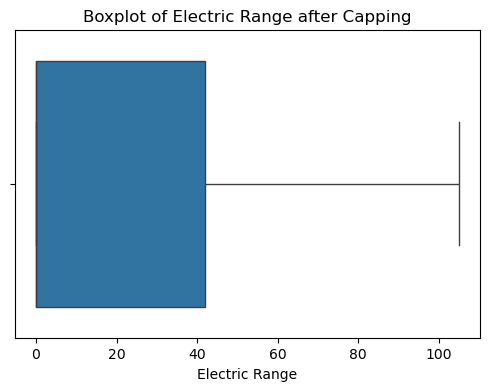

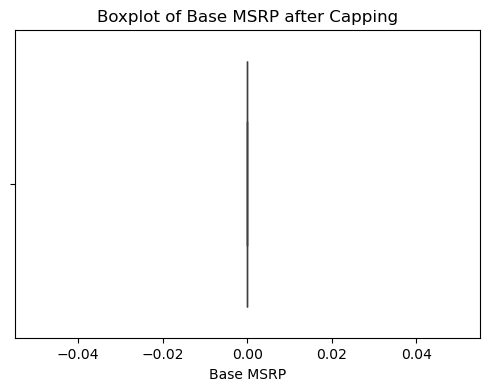

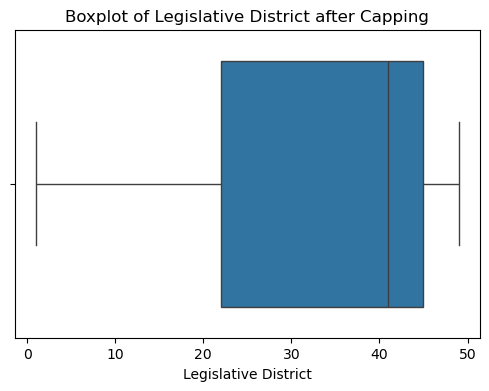

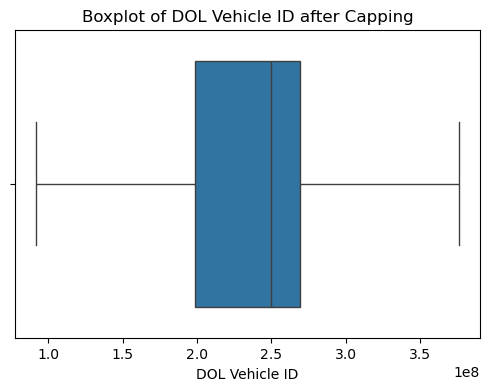

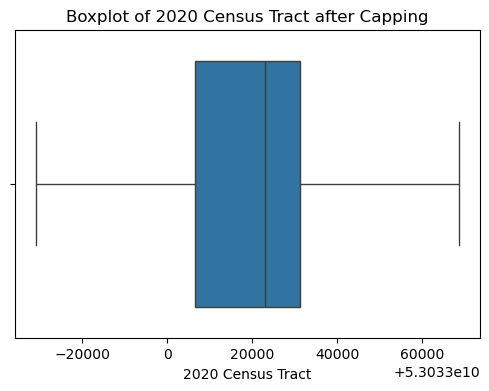

In [129]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns  


plt.figure(figsize=(12, 6))  

for column in numeric_cols:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=df[column])  
    plt.title(f"Boxplot of {column} after Capping")  
    plt.show()  

In [38]:
#all the columns in the dataset
df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

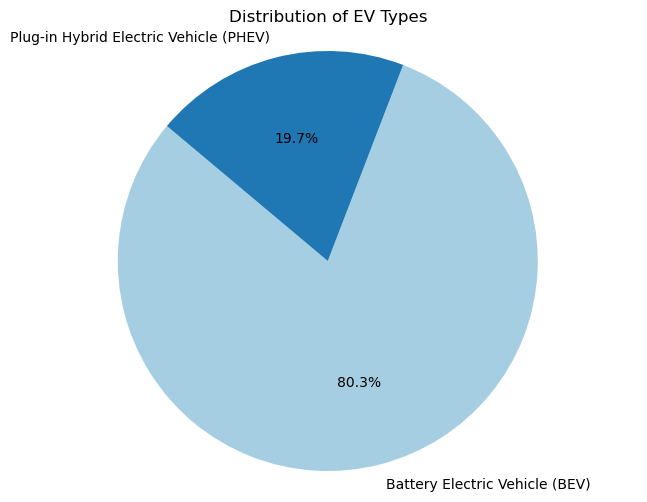

In [93]:
# Data Visualization


# Count the occurrences of each EV type
ev_counts = df['Electric_Vehicle_Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(ev_counts, labels=ev_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of EV Types')
plt.axis('equal')  
plt.show()


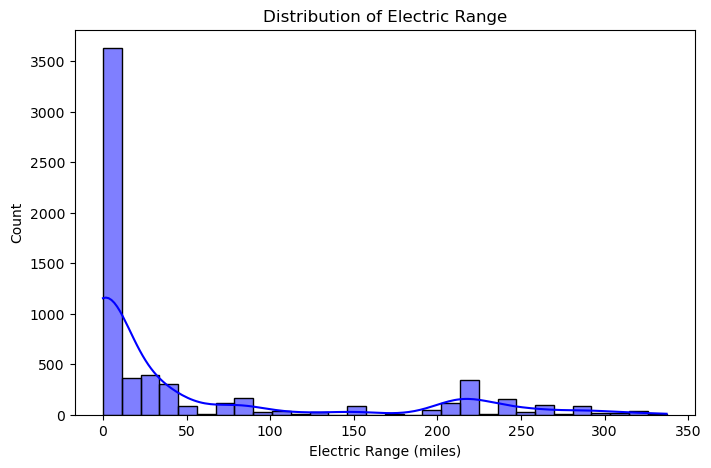

In [54]:
# Visualization: Distribution of Electric Range
plt.figure(figsize=(8,5))
sns.histplot(df['Electric_Range'], bins=30, kde=True, color='blue')
plt.xlabel("Electric Range (miles)")
plt.ylabel("Count")
plt.title("Distribution of Electric Range")
plt.show()


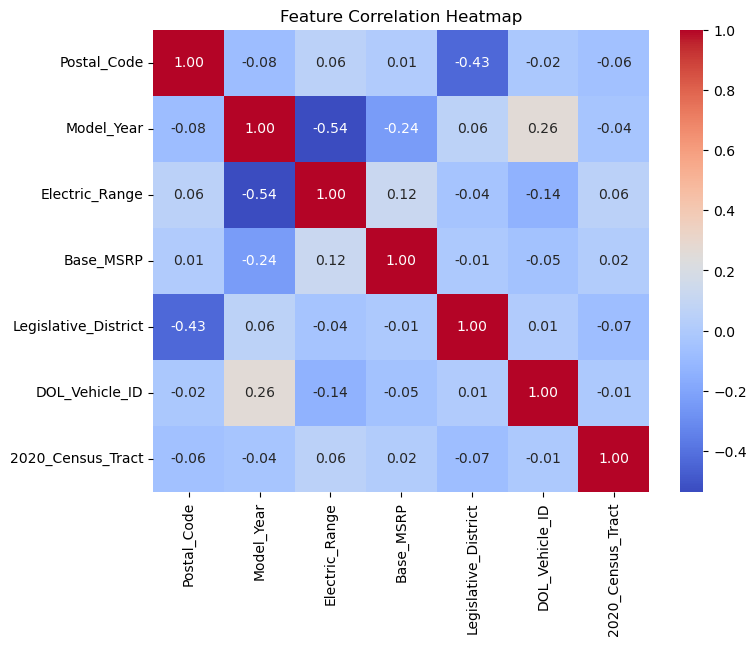

In [60]:
#  Correlation Heatmap

numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()




<Axes: ylabel='Electric_Utility'>

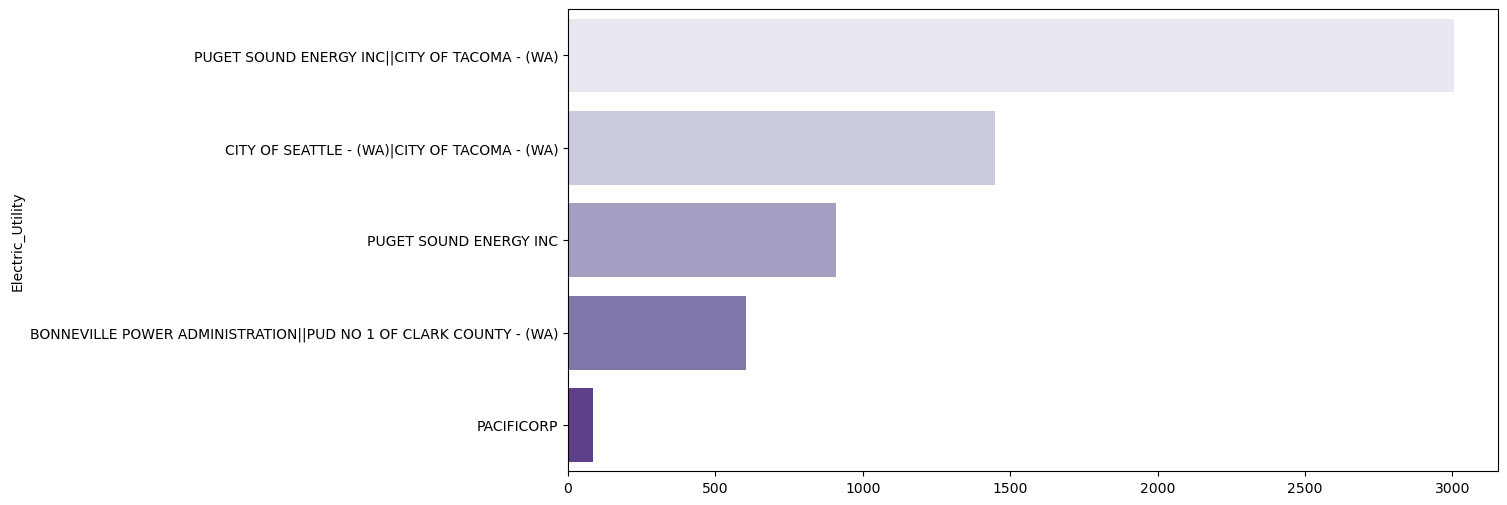

In [64]:
# Electricity Utility Usage

plt.figure(figsize=(12, 6))
top_utilities = df['Electric_Utility'].value_counts().head(5)
sns.barplot(x=top_utilities.values, y=top_utilities.index, hue=top_utilities.index, palette='Purples', legend=False)

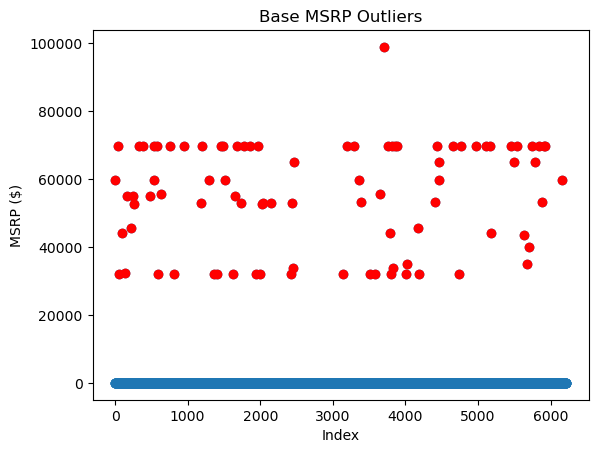

In [66]:
# IQR calculation
Q1 = df['Base_MSRP'].quantile(0.25)
Q3 = df['Base_MSRP'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Base_MSRP'] < Q1 - 1.5 * IQR) | (df['Base_MSRP'] > Q3 + 1.5 * IQR)]

# Basic scatter plot
plt.scatter(df.index, df['Base_MSRP'])
plt.scatter(outliers.index, outliers['Base_MSRP'], color='red')
plt.title('Base MSRP Outliers')
plt.xlabel('Index')
plt.ylabel('MSRP ($)')
plt.show()

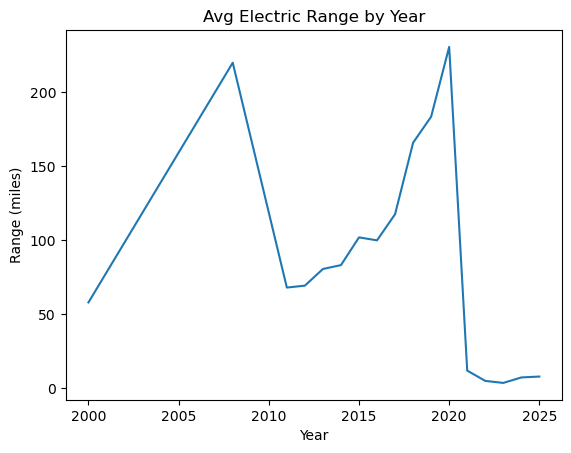

In [68]:
# Average electric range by model year
avg_range = df.groupby('Model_Year')['Electric_Range'].mean()

# Basic line plot
plt.plot(avg_range.index, avg_range.values)
plt.title('Avg Electric Range by Year')
plt.xlabel('Year')
plt.ylabel('Range (miles)')
plt.show()